In [1]:
# Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
results = []
results = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date)==6 ).all()

#print(results)

In [5]:
#  3. Convert the June temperatures to a list.
june_temps= list(results)

#june_temps

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
June_df = pd.DataFrame(june_temps, columns=['date','temperature'])
June_df.set_index(June_df['date'], inplace=True)

#print(June_df.to_string(index=False))

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
June_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_dec = []
results_dec = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month', Measurement.date)==12).all()

#print(results_dec)

In [9]:
# 7. Convert the December temperatures to a list.
dec_temps= list(results_dec)

#dec_temps

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
Dec_df = pd.DataFrame(dec_temps, columns=['date','temperature'])
Dec_df.set_index(Dec_df['date'], inplace=True)

#print(Dec_df.to_string(index=False))

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
Dec_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### Comparing June to December Stats!

In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

Text(0.5, -1.340000000000014, 'Temperature')

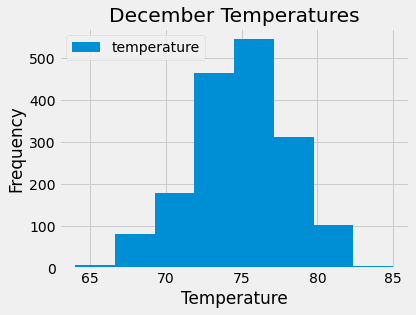

In [13]:
June_df.plot.hist(bins=8)
plt.tight_layout()
plt.title('December Temperatures')
plt.xlabel('Temperature')


[(55.0, 90.0)]

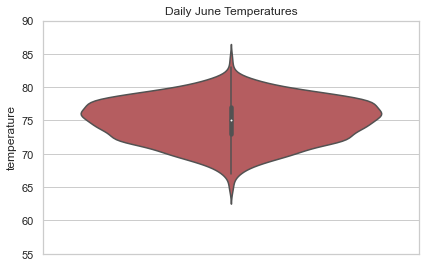

In [59]:
sns.set_theme(style="whitegrid")

ax=sns.violinplot(y= June_df["temperature"], color='r')
ax.set_title('Daily June Temperatures')
ax.set(ylim=(55, 90))


In [19]:
June_precip = []
June_precip = session.query(Measurement.date, Measurement.prcp).\
filter(extract('month', Measurement.date)==6).all()


In [20]:
June_precip_list= list(June_precip)

In [21]:
June_prcp_df = pd.DataFrame(June_precip_list, columns=['date','precipitation'])
June_prcp_df.set_index(June_prcp_df['date'], inplace=True)

In [22]:
June_prcp_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


(0.0, 150.0)

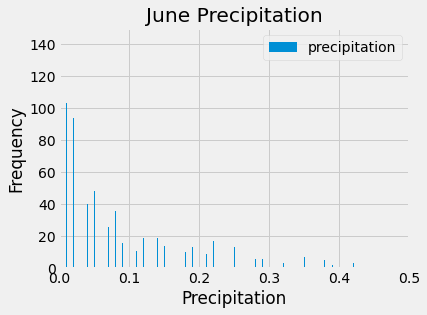

In [23]:
June_prcp_df.plot.hist(bins=5000)
plt.tight_layout()
plt.title('June Precipitation')
plt.xlabel('Precipitation')
plt.xlim(0,.5)
plt.ylim(0,150)

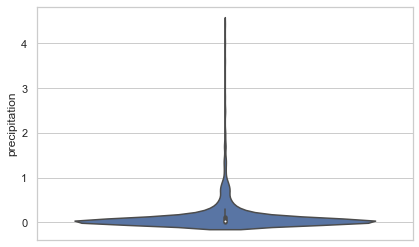

In [47]:
sns.set_theme(style="whitegrid")

ax=sns.violinplot(y= June_prcp_df["precipitation"])

Text(0.5, -1.340000000000014, 'Temperature')

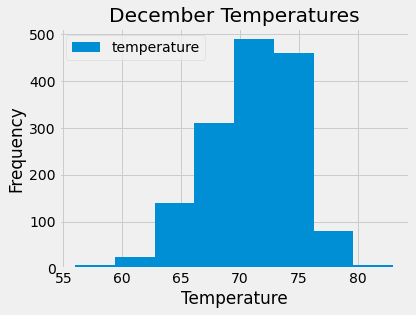

In [24]:
Dec_df.plot.hist(bins=8)
plt.tight_layout()
plt.title('December Temperatures')
plt.xlabel('Temperature')


[(55.0, 90.0)]

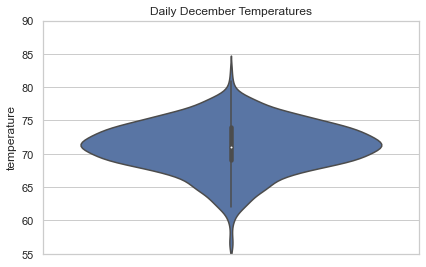

In [53]:
sns.set_theme(style="whitegrid")

ax=sns.violinplot(y=Dec_df["temperature"])
ax.set_title('Daily December Temperatures')
ax.set(ylim=(55, 90))

In [25]:
Dec_precip = []
Dec_precip = session.query(Measurement.date, Measurement.prcp).\
filter(extract('month', Measurement.date)==12).all()

In [26]:
Dec_precip_list= list(Dec_precip)

In [27]:
Dec_prcp_df = pd.DataFrame(Dec_precip_list, columns=['date','precipitation'])
Dec_prcp_df.set_index(Dec_prcp_df['date'], inplace=True)

In [28]:
Dec_prcp_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


(0.0, 150.0)

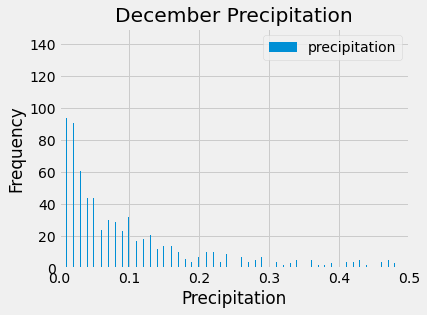

In [29]:
Dec_prcp_df.plot.hist(bins=5000)
plt.tight_layout()
plt.title('December Precipitation')
plt.xlabel('Precipitation')
plt.xlim(0,.5)
plt.ylim(0,150)

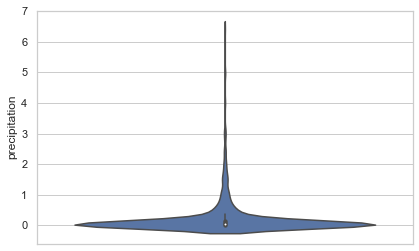

In [48]:
sns.set_theme(style="whitegrid")

ax=sns.violinplot(y= Dec_prcp_df["precipitation"])